## Step 1: Data extraction

#### Instructions
Your assignment is to create an informative graph, starting from scratch, and following best practices for reproducible research. You are allowed to collect data of your choice. For example, you could collect through one of the following means:

- Web-data using web-scraping APIs (similar to what we discussed in class)
- Twitter data using the Twitter API (e.g., https://python-twitter.readthedocs.io/en/latest/getting_started.htmlLinks to an external site.)
- Wikipedia data using the Wikipedia API (e.g., https://pypi.org/project/Wikipedia-API/Links to an external site.)
- Survey data with Google Forms or street interviews
 
 If you use an API/Libraries (e.g.., BeautifulSoup/TwitterAPI/WikipediaAPI) to collect data, please include what API you used and your code that makes API calls. If you choose not to use an API to collect data, note that each of the datasets should have at least 50 data points with at least 4 attributes each. If you are using API/Libraries, the expectation is that you collect data that has more than 200 data points with at least 4 attributes each. In any case, you are, of course, allowed to gather and merge data from different sources, but do cite all the sources and clearly mention your merging criteria.

#### Documentation:

- Using the data from IMDb top 1000 grossing movies https://www.imdb.com/list/ls098063263/?sort=list_order,asc&st_dt=&mode=detail&page=1, I extract the movie name, year, gross, metascore, votes and rating. 
- First, I import BeautifulSoup, requests and pprint 
- Then, I create a function get_data to get the data with the url https://www.imdb.com/list/ls098063263/?sort=list_order,asc&st_dt=&mode=detail&page={page_num}
- After thatm I create an empty list that stores a dictionary of different movies with their respective features and information 
- At last, I call the function get_data ten times with increment page numbers to conclude a list of all of the movies. 

In [1]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint


def get_data(page_num):
    url = f'https://www.imdb.com/list/ls098063263/?sort=list_order,asc&st_dt=&mode=detail&page={page_num}'
    data = requests.get(url)

    my_data = []

    html = BeautifulSoup(data.text, 'html.parser')
    card_movies = html.select('div.lister-item')
    
    # for each card movie perform data extraction on the title, year, rating, metascore, votes and gross. 
    for card_movie in card_movies:
        title_and_year = card_movie.select(".lister-item-header")[0].get_text()
        title = title_and_year.split("\n")[2]
        year = title_and_year.split("\n")[3].split("(")[1].split(")")[0]
        rating = card_movie.select(".ipl-rating-star__rating")[0].get_text()

        try:
            metascore = float(card_movie.select(".metascore")[0].get_text())
            votes = card_movie.find_all("span", {'name' : "nv"})[0]["data-value"]
            gross = "".join(card_movie.find_all("span", {'name' : "nv"})[1]["data-value"].split(","))
            my_data.append({"title": title, "year" : year, "rating": rating, "metascore" : metascore, "gross" : gross, "votes" : votes})
        except:
            continue
    
#     print(len(my_data))
    return my_data

master_data = []

# get the data for 10 pages 
for i in range(10):
    master_data += get_data(i + 1)
    

## Step 2: Data transformation and load

Almost always when working with real-world data, we need to process the data to prepare it for analysis. For example, we may wish to convert times or dates, group certain sets of answers together, normalize columns (e.g., convert strings into floats), or any number of other operations. API responses may come in JSON format. Perform what processing steps you see fit to the raw data, ensuring that you keep a copy of the raw data, and save the processed data to a CSV file. This processed data will be the file that you share on data.world.

#### Documentation

- For each movies in the dataset, I will convert the metascore, votes, rating, gross, year from string to float as part of data transformation step. 

In [142]:
master_data_copy = master_data[:]

for i in range(len(master_data_copy)):
    data = master_data_copy[i]
    if data["year"] == "II" or data["year"] == "I" or data["year"] == "IX":
        data["year"] = ""
    else:
        try: 
            data["metascore"] = float(data["metascore"])
            data["rating"] = float(data["rating"])
            data["gross"] = float(data["gross"])
            data["votes"] = float(data["votes"])
        except:
            continue




## Step 3: Analysis: Summary and visualizations

For this assignment, the analysis requested is fairly minimal. We would like to visualize some element of the data collected. This could be a trend over time or a point-in-time comparison. To aid you in choosing what to plot on your graph, consider: what surprised you about your data? What do you think is most important about your data?

Obtain basic descriptive statistics, plot your data using suitable visualization graphs and charts. Make sure that your graphs have descriptive titles; labels for any axes, including units; and legends, wherever needed. All plots should be shown in the Jupyter notebook.

#### Documentation: 
- To aid you in choosing what to plot on your graph, consider: what surprised you about your data? What do you think is most important about your data?

I am surprised that my dataset is very clean, and different columns can help to predict the gross earnings of a movie including metascore and rating. 
The most important thing about my data is the columns of metascore, rating and gross earnings. 

Therefore, I would choose to plot the data with scatterplot to determine the relationship between metascore and gross earnings. I also use histogram bar graph to display the data and examine the distribution of the gross and the metascore over the year. 


- Obtain basic descriptive statistics, plot your data using suitable visualization graphs and charts. Make sure that your graphs have descriptive titles; labels for any axes, including units; and legends, wherever needed. All plots should be shown in the Jupyter notebook.'




In [143]:
import pandas 

final_data = pandas.DataFrame(master_data_copy)

final_data.head()

,title,year,rating,metascore,gross,votes
0,Avatar,2009,7.9,83.0,760507625.0,1326223.0
1,Avengers: Endgame,2019,8.4,78.0,858373000.0,1152470.0
2,Titanic,1997,7.9,75.0,659325379.0,1198617.0
3,Star Wars: Episode VII - The Force Awakens,2015,7.8,80.0,936662225.0,938755.0
4,Avengers: Infinity War,2018,8.4,68.0,678815482.0,1099025.0


In [144]:

final_data = final_data.dropna()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      960 non-null    object 
 1   year       960 non-null    object 
 2   rating     960 non-null    float64
 3   metascore  960 non-null    float64
 4   gross      960 non-null    float64
 5   votes      960 non-null    float64
dtypes: float64(4), object(2)
memory usage: 45.1+ KB


In [155]:
final_data = final_data[final_data["year"] != ""]

final_data = final_data.astype({'year':'int'})

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 959
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      909 non-null    object 
 1   year       909 non-null    int64  
 2   rating     909 non-null    float64
 3   metascore  909 non-null    float64
 4   gross      909 non-null    float64
 5   votes      909 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 49.7+ KB


In [156]:
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")
# Delete duplicate rows
final_data = final_data.drop_duplicates()
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


In [32]:
# Obtain basic descriptive statistics 
final_data.describe()

,year,metascore
count,909.000000,909.000000
mean,2007.082508,59.628163
std,10.488866,15.973282
min,1937.000000,12.000000
25%,2001.000000,48.000000
50%,2009.000000,59.000000
75%,2015.000000,71.000000
max,2022.000000,100.000000


Text(0.5, 1.0, 'Metascore-vs-Gross')

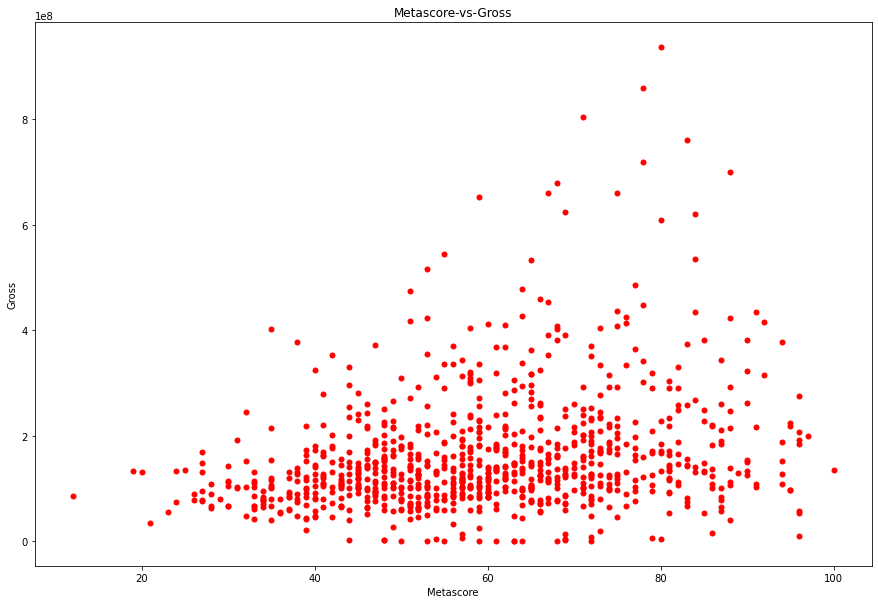

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 

metascore = final_data["metascore"]
gross = final_data["gross"]
year = final_data["year"]
rating = final_data["rating"]

plt.figure(figsize = (15,10))
plt.xlabel("Metascore")
plt.ylabel("Gross")
plt.scatter(metascore,gross, marker=".", color = "red", s = 100)

# We can add a title too
plt.title("Metascore-vs-Gross")



In [57]:
# Pearson correlation 
import scipy.stats as stats

# create two arrays of data

# calculate the Pearson correlation coefficient and p-value
corr, pval = stats.pearsonr(metascore, gross)

# print the result
print("Pearson correlation coefficient:", corr)
print("p-value:", pval)


Pearson correlation coefficient: 0.2675120935900632
p-value: 2.3199147646992676e-16


Text(0.5, 1.0, 'Rating-vs-Gross')

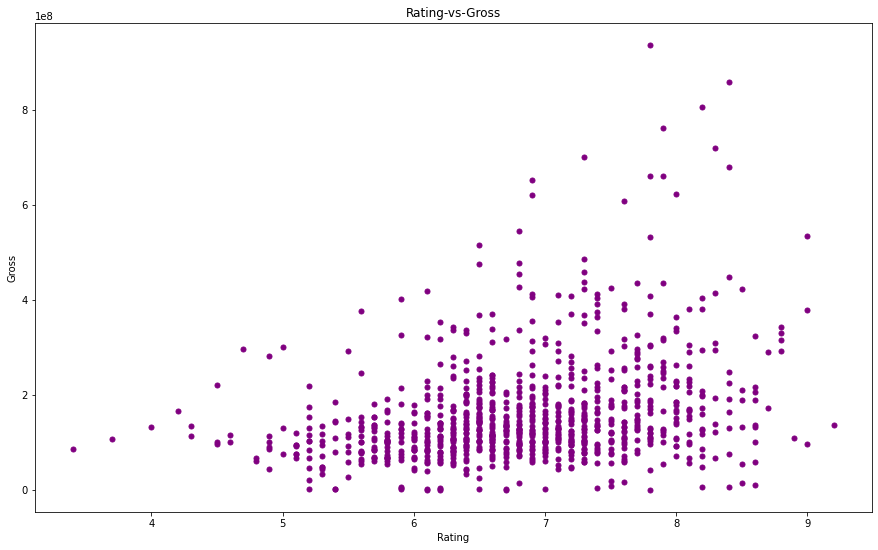

In [59]:
from matplotlib import pyplot as plt
import numpy as np 

metascore = final_data["metascore"]
gross = final_data["gross"]
year = final_data["year"]
rating = final_data["rating"]

plt.figure(figsize = (15,9))
plt.xlabel("Rating")
plt.ylabel("Gross")
plt.scatter(rating,gross, marker=".", color = "purple", s = 100)

# We can add a title too
plt.title("Rating-vs-Gross")



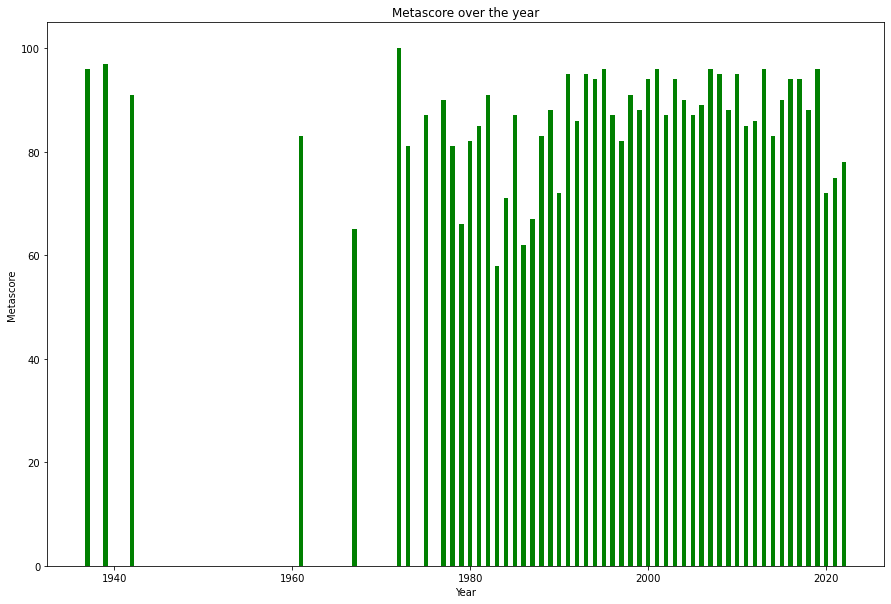

In [55]:


gross = final_data["gross"]
metascore = final_data["metascore"]
year = final_data["year"]
  
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(year, metascore, color='g', width = 0.5)
 
plt.xlabel("Year")
plt.ylabel("Metascore")
plt.title("Metascore over the year")
plt.show()



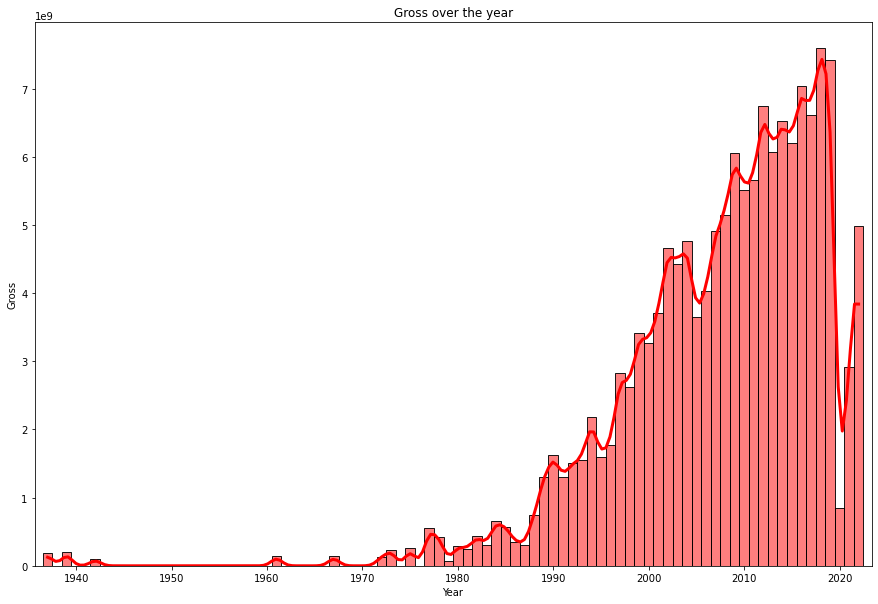

In [60]:


gross = final_data["gross"]
metascore = final_data["metascore"]
year = final_data["year"]

fig = plt.figure(figsize = (15, 10))
plt.xlabel("Year")
plt.ylabel("Gross")
plt.title("Gross over the year")
ax = sns.histplot(x=year, weights=gross, discrete=True,
                  kde=True, kde_kws={'bw_adjust': 0.2}, line_kws={'linewidth': 3}, color = "red")
ax.margins(x=0.01)
plt.show()


In [161]:
# Pearson correlation 
import scipy.stats as stats

# create two arrays of data

# calculate the Pearson correlation coefficient and p-value
corr, pval = stats.pearsonr(rating, gross)

# print the result
print("Pearson correlation coefficient:", corr)
print("p-value:", pval)


Pearson correlation coefficient: 0.3039680031297526
p-value: 6.942489377898912e-21


In [163]:
length = final_data.shape[0]
final_data.to_csv(f"Top_{length}_grossing_movies.csv")


### Insights: 

- According to the findings, there appears to be a relationship between metascore, rating, and grossing, although the correlations are weak. Specifically, there is a weak correlation between metascore and grossing, as well as between rating and grossing.

- The top grossing movie on the list is Avatar, which earned 760.51 million dollars and received a metascore of 83 and a rating of 7.9. The lowest grossing movie on the list made 109.45 million dollars, with a rating of 7.1 and a metascore of 73. The mean and median metascore values are fairly close at 59.63 and 59, respectively, suggesting a slightly right-skewed distribution. However, the mean and median gross values are quite far apart, with a mean of 162,000,000 and a median of 131,000,000, indicating a right-skewed distribution.





## Step 4: Documentation

We will follow best practices for documentation as described in the readings on reproducibility. You need to have documentation in three places: your Jupyter notebook, your README file on GitHub, and with your dataset on data.world.

 Your Jupyter notebook should include:

Clear descriptions of each collection and processing step in Markdown sentences, not code comments


Your README should include:

The goal of your project
Links to any relevant API documentation
The license of your data and any source data
A data type and description for each attribute in your data
Any known issues or potential issues, such as sources of bias in collection


Your dataset at data.world should be accompanied by:

A project summary that explains your collection, processing and analysis methods as a high level, as well as links to your GitHub repo
A data dictionary with a data type and description for each attribute in your data


## Step 5: Publication and Submission

Submit your processed data as a CSV file on data.world. Add a brief project description, your project summary, and your data dictionary.

 Create a public GitHub repository for your analysis. Upload your code and data. Add a README and a LICENSE for the repo. The README should include all of your documentation about the data (such as its provenance, any quirks in your data, potential biases, etc.) and the analysis (what you are showing, and why). The LICENSE should be an MIT LicenseLinks to an external site. for your code.

 On Canvas, submit links to your GitHub repo and data.world dataset, as well as the image file of your final visualization.

Tip: someone who stumbles across your GitHub repo should be able to fully reproduce your analysis. In that event, what information would that person want or need? Make sure you include it!